In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [4]:
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("ITSM_data.csv")
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,4/11/2023 13:50,4/11/2023 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,2/12/2023 12:31,2/12/2023 12:36,2/12/2023 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2024 15:12,13-01-2024 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2023 09:31,14-11-2023 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,8/11/2023 13:55,8/11/2023 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,...,NaN,31-03-2024 16:29,31-03-2024 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,...,NaN,31-03-2024 15:29,31-03-2024 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,...,NaN,31-03-2024 15:32,31-03-2024 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,...,NaN,31-03-2024 15:42,31-03-2024 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


In [6]:
df['Open_Time'] = pd.to_datetime(df['Open_Time'], errors='coerce')
df = df.dropna(subset=['Open_Time'])
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,4/11/2023 13:50,4/11/2023 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,2/12/2023 12:31,2/12/2023 12:36,2/12/2023 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,8/11/2023 13:55,8/11/2023 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
5,WBA000124,application,Web Based Application,WBS000088,IM0000013,Closed,4,4,4.0,0.006676,...,NaN,8/11/2023 13:54,8/11/2023 13:54,"3,38,34,36,944",Other,1.0,SD0000031,NaN,NaN,NaN
9,WBA000082,application,Web Based Application,WBS000055,IM0000018,Closed,4,4,4.0,0.306670,...,NaN,8/11/2023 14:33,8/11/2023 14:35,"3,21,15,26,944",No error - works as designed,1.0,SD0000037,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42841,DTA000616,application,Desktop Application,WBS000089,IM0043209,Closed,5,5,5.0,0.120229,...,19-03-2024 10:08,27-03-2024 15:22,27-03-2024 15:22,"3,25,86,38,889",Software,2.0,#MULTIVALUE,NaN,NaN,NaN
42842,SBA000338,application,Server Based Application,WBS000169,IM0043210,Closed,4,4,4.0,0.442480,...,NaN,18-03-2024 09:36,18-03-2024 09:37,"1,44,70,55,556",Software,1.0,SD0132850,NaN,NaN,NaN
42843,SBA000459,application,Server Based Application,WBS000073,IM0043211,Closed,4,4,4.0,0.715653,...,NaN,13-03-2024 07:40,13-03-2024 07:40,"0,8675",Operator error,1.0,SD0132859,NaN,NaN,NaN
42844,SUB000456,subapplication,Web Based Application,WBS000073,IM0043212,Closed,4,4,4.0,0.435833,...,NaN,13-03-2024 07:26,13-03-2024 07:27,0,Operator error,1.0,SD0132866,NaN,NaN,NaN


In [7]:
df['timestamp'] = df['Open_Time']
df['year'] = df['timestamp'].dt.year
df['quarter'] = df['timestamp'].dt.quarter
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change,timestamp,year,quarter
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN,2022-05-02 13:32:00,2022,2
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN,2022-12-03 15:44:00,2022,4
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN,2022-10-08 11:01:00,2022,4
5,WBA000124,application,Web Based Application,WBS000088,IM0000013,Closed,4,4,4.0,0.006676,...,"3,38,34,36,944",Other,1.0,SD0000031,NaN,NaN,NaN,2022-10-08 11:27:00,2022,4
9,WBA000082,application,Web Based Application,WBS000055,IM0000018,Closed,4,4,4.0,0.306670,...,"3,21,15,26,944",No error - works as designed,1.0,SD0000037,NaN,NaN,NaN,2022-03-09 16:04:00,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42841,DTA000616,application,Desktop Application,WBS000089,IM0043209,Closed,5,5,5.0,0.120229,...,"3,25,86,38,889",Software,2.0,#MULTIVALUE,NaN,NaN,NaN,2024-12-03 16:56:00,2024,4
42842,SBA000338,application,Server Based Application,WBS000169,IM0043210,Closed,4,4,4.0,0.442480,...,"1,44,70,55,556",Software,1.0,SD0132850,NaN,NaN,NaN,2024-12-03 16:59:00,2024,4
42843,SBA000459,application,Server Based Application,WBS000073,IM0043211,Closed,4,4,4.0,0.715653,...,"0,8675",Operator error,1.0,SD0132859,NaN,NaN,NaN,2024-12-03 17:18:00,2024,4
42844,SUB000456,subapplication,Web Based Application,WBS000073,IM0043212,Closed,4,4,4.0,0.435833,...,0,Operator error,1.0,SD0132866,NaN,NaN,NaN,2024-12-03 18:40:00,2024,4


In [8]:
df['year_quarter'] = df['year'].astype(str) + '-Q' + df['quarter'].astype(str)
df['CI_Cat'] = df['CI_Cat'].fillna('Unknown')
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change,timestamp,year,quarter,year_quarter
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,Other,1.0,SD0000007,2.0,NaN,NaN,2022-05-02 13:32:00,2022,2,2022-Q2
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,Software,1.0,SD0000011,1.0,NaN,NaN,2022-12-03 15:44:00,2022,4,2022-Q4
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,Other,1.0,SD0000029,NaN,NaN,NaN,2022-10-08 11:01:00,2022,4,2022-Q4
5,WBA000124,application,Web Based Application,WBS000088,IM0000013,Closed,4,4,4.0,0.006676,...,Other,1.0,SD0000031,NaN,NaN,NaN,2022-10-08 11:27:00,2022,4,2022-Q4
9,WBA000082,application,Web Based Application,WBS000055,IM0000018,Closed,4,4,4.0,0.306670,...,No error - works as designed,1.0,SD0000037,NaN,NaN,NaN,2022-03-09 16:04:00,2022,1,2022-Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42841,DTA000616,application,Desktop Application,WBS000089,IM0043209,Closed,5,5,5.0,0.120229,...,Software,2.0,#MULTIVALUE,NaN,NaN,NaN,2024-12-03 16:56:00,2024,4,2024-Q4
42842,SBA000338,application,Server Based Application,WBS000169,IM0043210,Closed,4,4,4.0,0.442480,...,Software,1.0,SD0132850,NaN,NaN,NaN,2024-12-03 16:59:00,2024,4,2024-Q4
42843,SBA000459,application,Server Based Application,WBS000073,IM0043211,Closed,4,4,4.0,0.715653,...,Operator error,1.0,SD0132859,NaN,NaN,NaN,2024-12-03 17:18:00,2024,4,2024-Q4
42844,SUB000456,subapplication,Web Based Application,WBS000073,IM0043212,Closed,4,4,4.0,0.435833,...,Operator error,1.0,SD0132866,NaN,NaN,NaN,2024-12-03 18:40:00,2024,4,2024-Q4


In [9]:
quarterly = df.groupby(['year_quarter', 'CI_Cat']).size().reset_index(name='ticket_count')
quarterly

,year_quarter,CI_Cat,ticket_count
0,2022-Q1,application,3
1,2022-Q2,subapplication,2
2,2022-Q3,application,1
3,2022-Q4,application,4
4,2023-Q1,Unknown,5
...,...,...,...
87,2024-Q4,networkcomponents,7
88,2024-Q4,officeelectronics,3
89,2024-Q4,software,19
90,2024-Q4,storage,37


In [10]:
quarterly['year'] = quarterly['year_quarter'].str.split('-Q').str[0].astype(int)
quarterly['quarter'] = quarterly['year_quarter'].str.split('-Q').str[1].astype(int)
quarterly['month'] = quarterly['quarter'] * 3
quarterly['date'] = pd.to_datetime(quarterly[['year', 'month']].assign(day=1))
quarterly

,year_quarter,CI_Cat,ticket_count,year,quarter,month,date
0,2022-Q1,application,3,2022,1,3,2022-03-01
1,2022-Q2,subapplication,2,2022,2,6,2022-06-01
2,2022-Q3,application,1,2022,3,9,2022-09-01
3,2022-Q4,application,4,2022,4,12,2022-12-01
4,2023-Q1,Unknown,5,2023,1,3,2023-03-01
...,...,...,...,...,...,...,...
87,2024-Q4,networkcomponents,7,2024,4,12,2024-12-01
88,2024-Q4,officeelectronics,3,2024,4,12,2024-12-01
89,2024-Q4,software,19,2024,4,12,2024-12-01
90,2024-Q4,storage,37,2024,4,12,2024-12-01


In [11]:
annual = df.groupby(['year', 'CI_Cat']).size().reset_index(name='ticket_count')
annual

,year,CI_Cat,ticket_count
0,2022,application,8
1,2022,subapplication,2
2,2023,Unknown,26
3,2023,application,7332
4,2023,applicationcomponent,2
5,2023,computer,865
6,2023,database,19
7,2023,displaydevice,59
8,2023,hardware,63
9,2023,networkcomponents,30


In [12]:
annual['date'] = pd.to_datetime(annual['year'].astype(str) + '-01-01')
annual

,year,CI_Cat,ticket_count,date
0,2022,application,8,2022-01-01
1,2022,subapplication,2,2022-01-01
2,2023,Unknown,26,2023-01-01
3,2023,application,7332,2023-01-01
4,2023,applicationcomponent,2,2023-01-01
5,2023,computer,865,2023-01-01
6,2023,database,19,2023-01-01
7,2023,displaydevice,59,2023-01-01
8,2023,hardware,63,2023-01-01
9,2023,networkcomponents,30,2023-01-01


In [13]:
periods_ahead = 4
forecasts = {}
categories = quarterly['CI_Cat'].unique()
categories

array(['application', 'subapplication', 'Unknown', 'computer', 'database',
       'displaydevice', 'hardware', 'networkcomponents',
       'officeelectronics', 'software', 'storage', 'applicationcomponent'],
      dtype=object)

In [15]:
for cat in categories:
    cat_data = quarterly[quarterly['CI_Cat'] == cat].sort_values('date')
    ts = cat_data.set_index('date')['ticket_count']

    if len(ts) < 8 or ts.std() == 0:
        continue

    train_size = int(len(ts) * 0.7)
    train, test = ts[:train_size], ts[train_size:]

    try:
        best_aic = float('inf')
        best_model = None
        for p in range(3):
            for d in range(2):
                for q in range(3):
                    try:
                        model = ARIMA(train, order=(p, d, q)).fit()
                        if model.aic < best_aic:
                            best_aic = model.aic
                            best_model = model
                    except:
                        continue

        forecast_arima = best_model.forecast(steps=periods_ahead)
    except:
        forecast_arima = None

    try:
        model_es = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=4).fit()
        forecast_es = model_es.forecast(periods_ahead)
    except:
        forecast_es = None

    forecasts[cat] = {
        'actual': ts,
        'forecast_arima': forecast_arima,
        'forecast_es': forecast_es,
        'future_dates': pd.date_range(start=ts.index[-1] + pd.DateOffset(months=3), periods=periods_ahead, freq='Q')
    }


In [16]:
plt.figure(figsize=(14, 6))


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

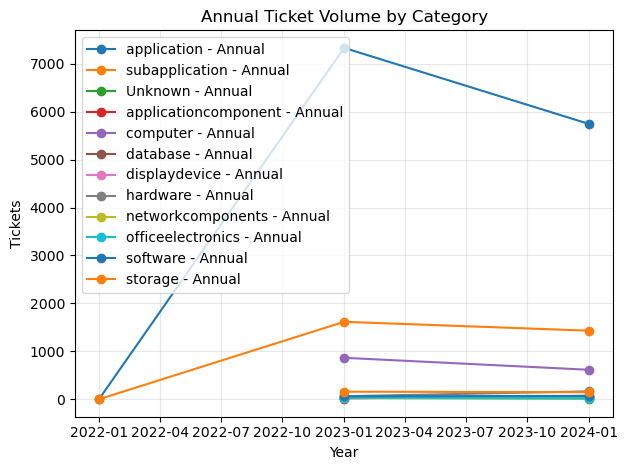

In [ ]:
for cat in annual['CI_Cat'].unique():
    data = annual[annual['CI_Cat'] == cat]
    plt.plot(data['date'], data['ticket_count'], marker='o', label=f"{cat} - Annual")
plt.title('Annual Ticket Volume by Category')
plt.xlabel('Year')
plt.ylabel('Tickets')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

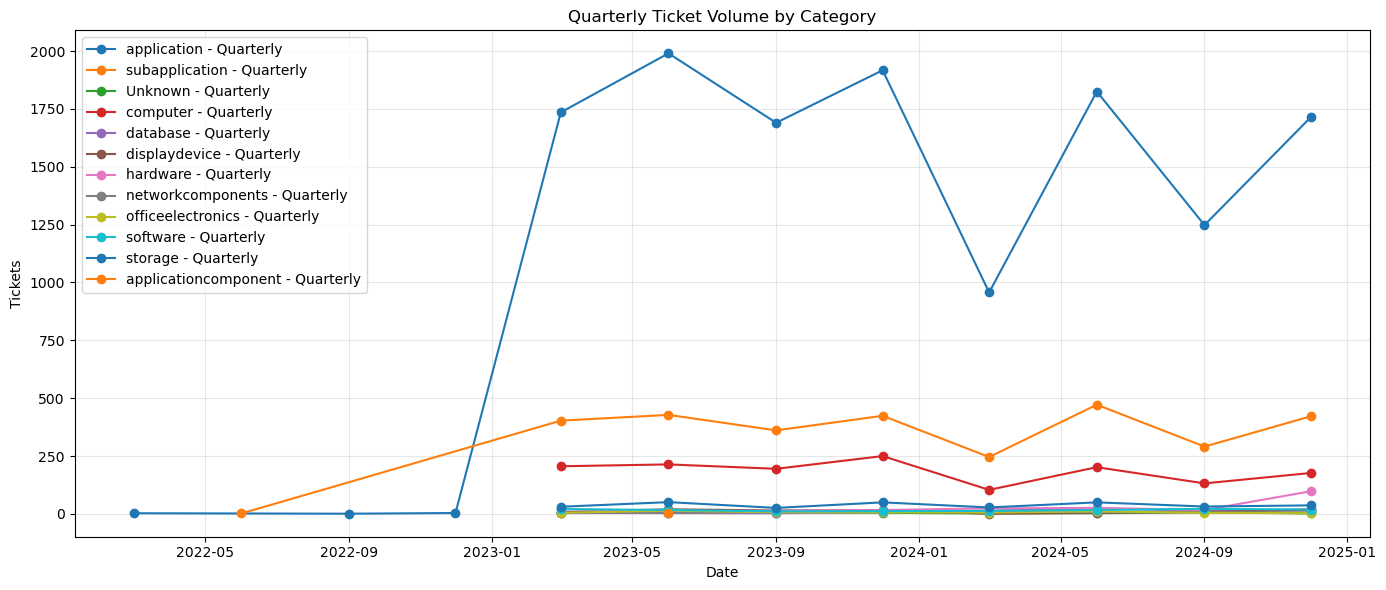

In [18]:
plt.figure(figsize=(14, 6))
for cat in quarterly['CI_Cat'].unique():
    data = quarterly[quarterly['CI_Cat'] == cat]
    plt.plot(data['date'], data['ticket_count'], marker='o', label=f"{cat} - Quarterly")
plt.title('Quarterly Ticket Volume by Category')
plt.xlabel('Date')
plt.ylabel('Tickets')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

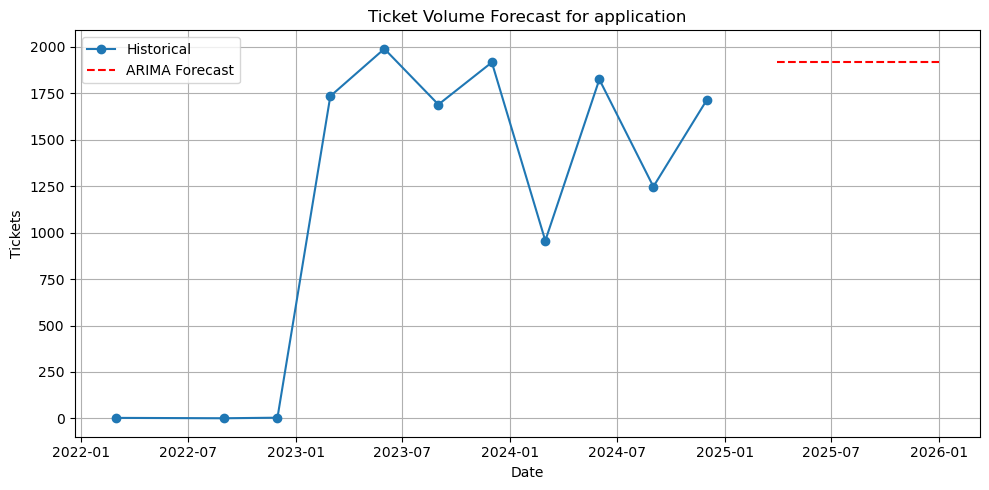

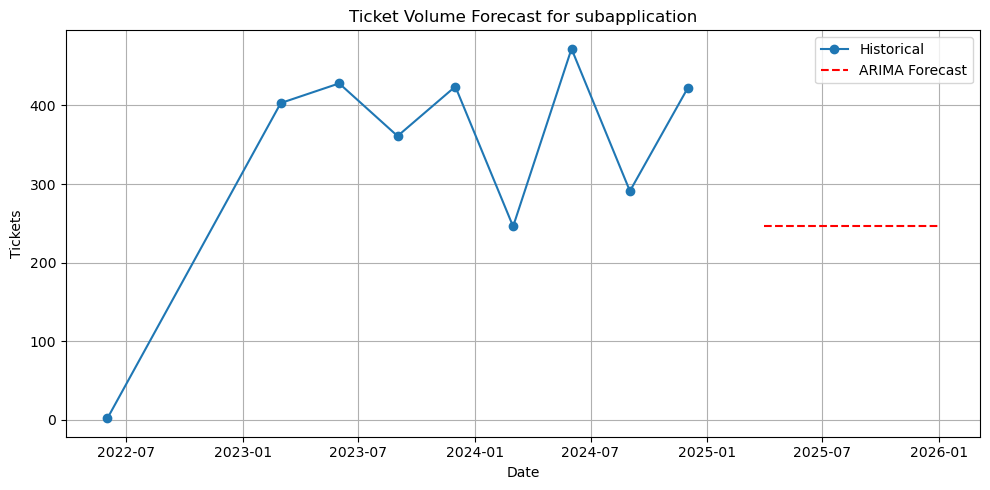

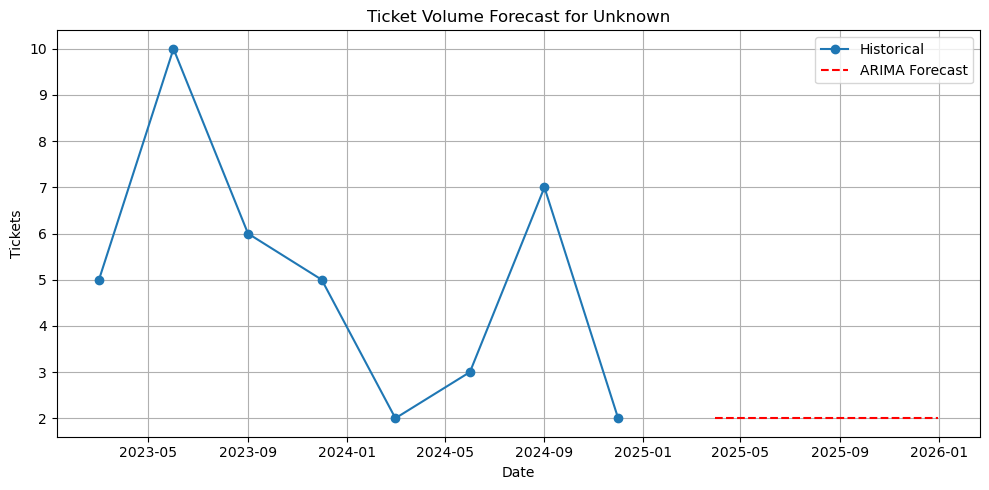

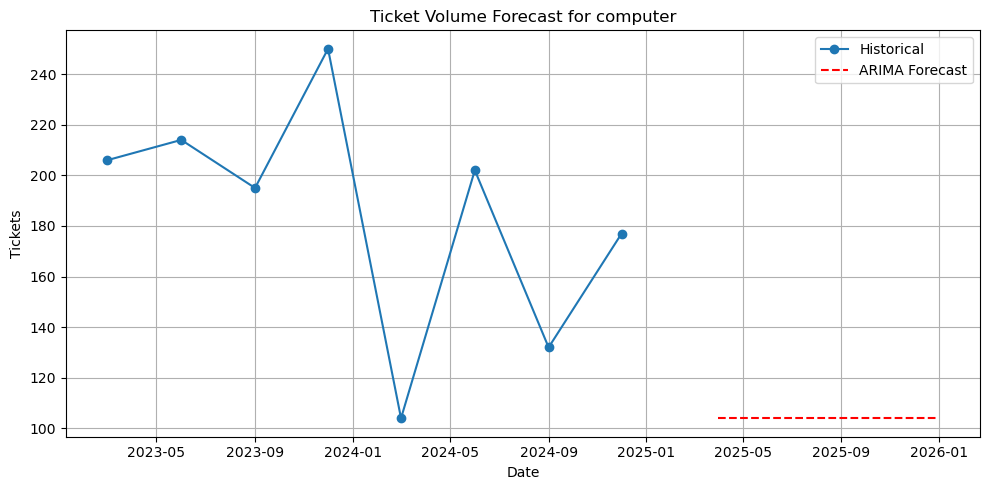

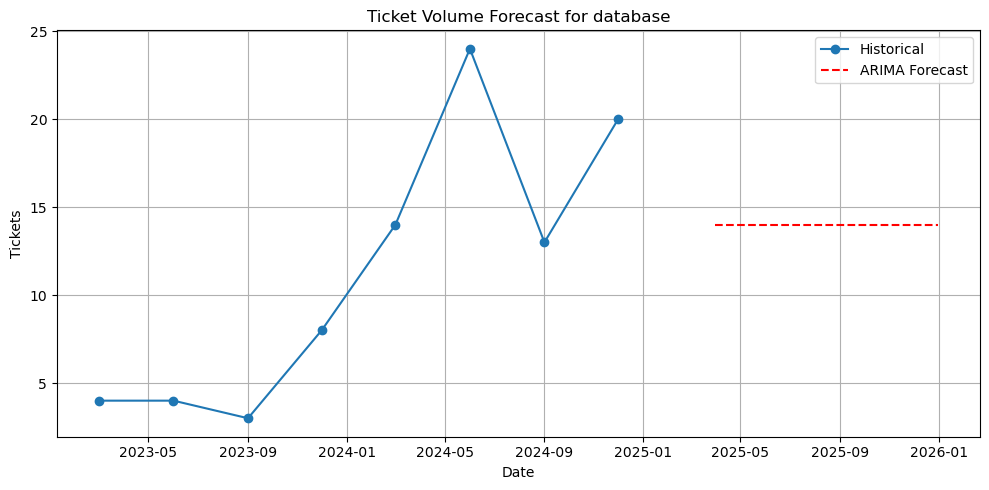

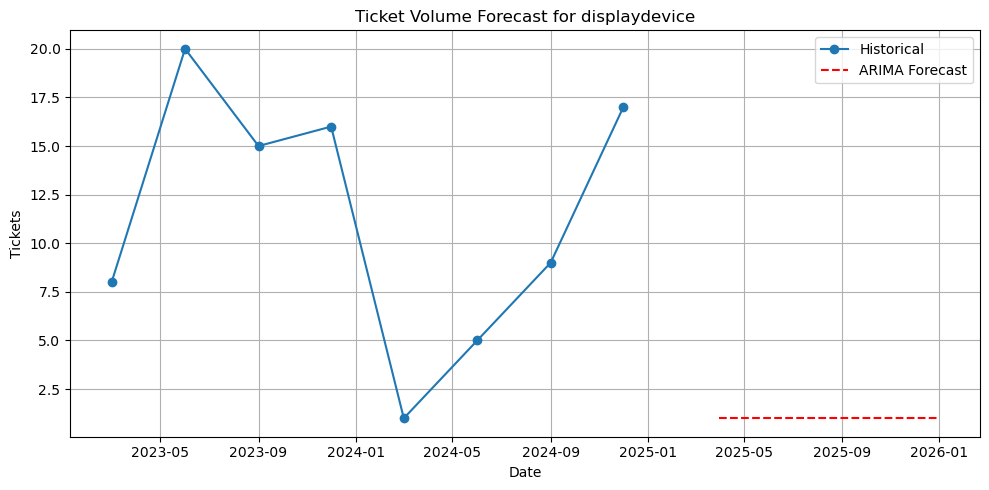

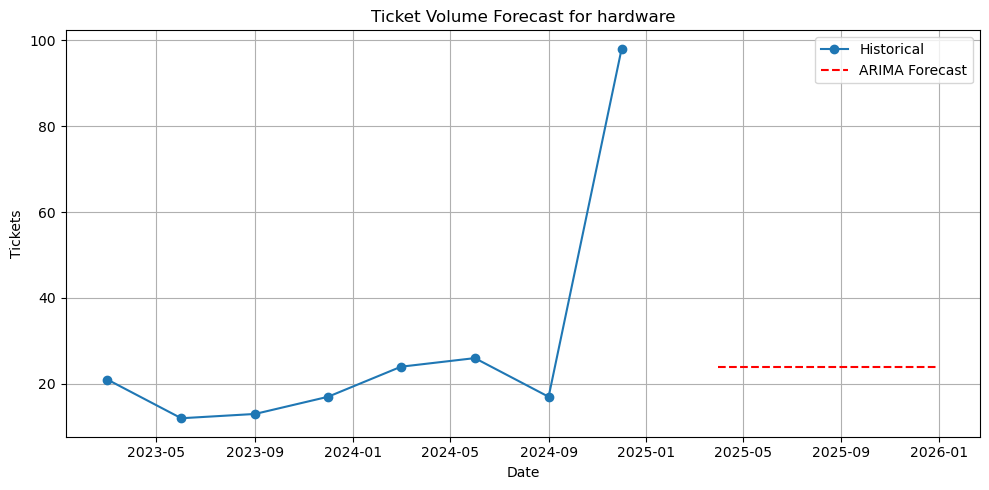

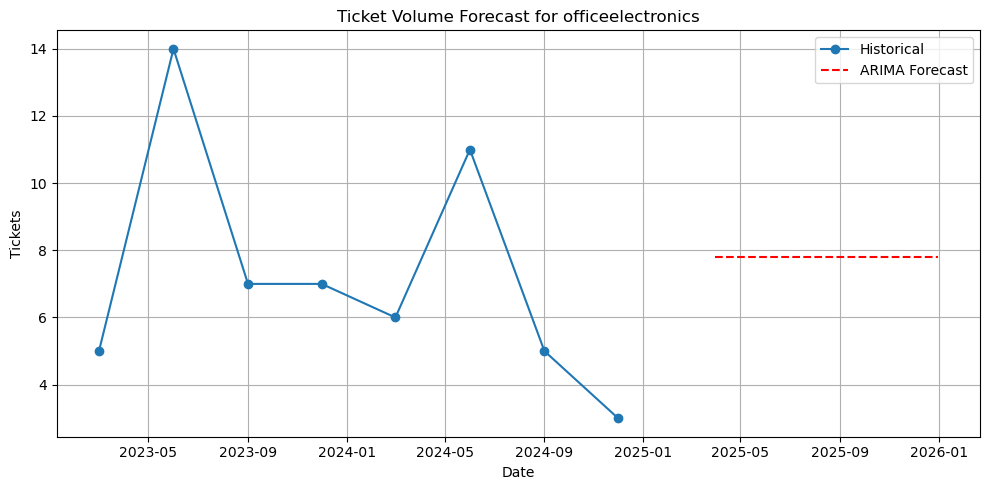

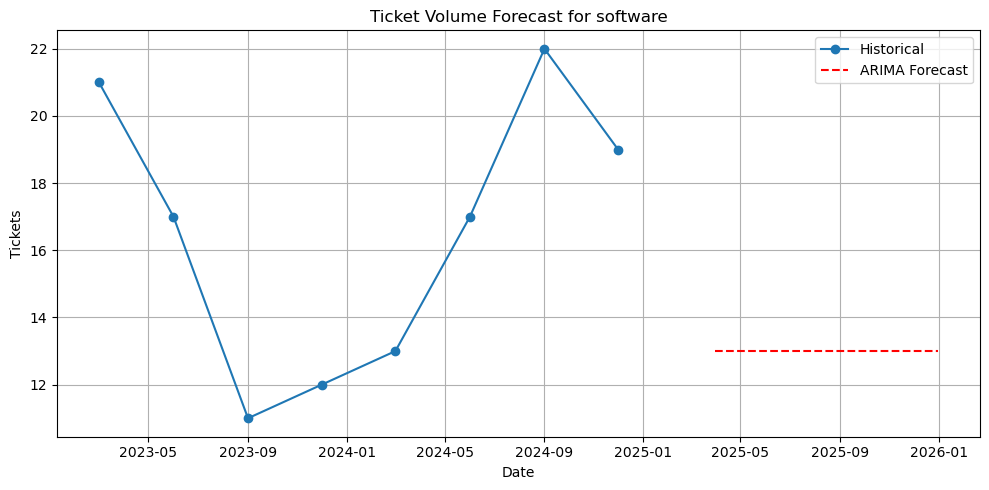

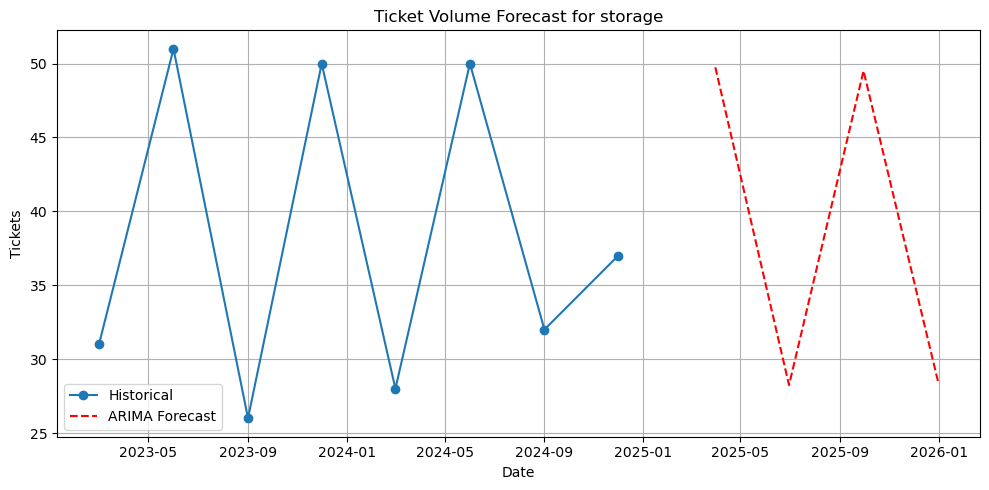

In [19]:
for cat, fcast in forecasts.items():
    plt.figure(figsize=(10, 5))
    plt.plot(fcast['actual'], label='Historical', marker='o')
    if fcast['forecast_arima'] is not None:
        plt.plot(fcast['future_dates'], fcast['forecast_arima'], 'r--', label='ARIMA Forecast')
    if fcast['forecast_es'] is not None:
        plt.plot(fcast['future_dates'], fcast['forecast_es'], 'g--', label='Exp. Smoothing Forecast')
    plt.title(f'Ticket Volume Forecast for {cat}')
    plt.xlabel('Date')
    plt.ylabel('Tickets')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()